#                                                   Webscraping Project - Zolo
####                                                                                          Truc Le

## Table of Contents:
1. Data Collection
2. Data Cleaning
3. Data Visualization and Analysis

### 1. Data Collection

In [2]:
# install selenium
!pip install selenium

In [3]:
# import selenium
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# import libraries
import re
from time import sleep
import datetime
from tqdm import tqdm

In [238]:
# set up the driver
path  = 'D:\\1. Studying\\4. Online Learning\\WeCloudData\\Data Science_Course content\\Week 2_Python\\Week 2_Day 5_Web Scraping\\chromedriver_win32\\chromedriver.exe'

s = Service(path)
driver = webdriver.Chrome(service=s)

In [245]:
# go to the website
driver.get("https://www.zolo.ca/")

In [1093]:
# create a dictionary to hold variables
properties_dict = {
    'address':[],
    'city':[],
    'price':[],
    'type':[],
    'style':[],
    'lot_size':[],
    'year_built':[],
    'taxes':[],
    'walk_score':[],
    'bedroom_num':[],
    'bathroom_num':[],
    'total_parking':[],
    'post_date':[],
    'postal_code':[],
    'mls_num':[],
    'listed_by':[]
}

In [247]:
# go through each main page

page  = 0

for page in range(1,202):
    # Set variable to be iterated throught pages
    url = f'https://www.zolo.ca/ottawa-real-estate/page-{page}'
    print(page)
    # Loop through one page
    #driver.get(webpage) - pass in the webpage you want to visit
    driver.get(url)
    contents = driver.find_elements(By.TAG_NAME,'article')
#     print(contents)
#     print(len(contents))
    # get all links
    links = []
    for i in contents[:36]:
        x = i.find_element(By.TAG_NAME,'a')
        link = x.get_attribute('href')
        links.append(link)
#     sleep(1)
    # iterate each link
    for link in links:
        driver.get(link)
        # use BeautifulSoup to parse page
        soup = BeautifulSoup(driver.page_source,'lxml')

        # get address
        try:
            address = soup.find(class_='address xs-text-2 sm-text-1 truncate heavy').get_text().strip('\n')
        except:
            address = np.nan
        properties_dict['address'].append(address)

        # get city
        try:
            city = soup.find(class_ = 'area truncate').get_text()
        except:
            city = np.nan
        properties_dict['city'].append(city)

        # get price
        try:
            price = soup.find(class_ = 'xs-text-2 sm-text-1 heavy xs-inline sm-block xs-mr2 sm-mr0').get_text().strip('\n')
            
        except:
            price = np.nan
        properties_dict['price'].append(price)

        # get number of bedroom
        try:
            bedroom_num = soup.find_all(class_ = 'tile-data xs-inline xs-mr1')[0].get_text()
        except:
            bedroom_num = np.nan
        properties_dict['bedroom_num'].append(bedroom_num)

        # get number of bathroom
        try:
            bathroom_num = soup.find_all(class_ = 'tile-data xs-inline xs-mr1')[1].get_text()
        except:
            bathroom_num = np.nan
        properties_dict['bathroom_num'].append(bathroom_num)
        
#         sleep(1)

        # get total parking
        # get different sub sections 
        try:
            sub_class_lst = soup.find_all('section',class_ = 'sm-mb3 sm-column-count-2 column-gap')
            # locate parking section
            parking_class = sub_class_lst[0].find_all('div',class_ = 'column-container column-break-inside-avoid')[3]
            # check if it is Parking section
            # if yes, get the value, else assign null value
            total_parking = np.nan
            if parking_class.find('h4').get_text() == 'Parking':
                for i in range(len(parking_class.find_all(class_ = 'column'))):
                    if parking_class.find_all(class_ = 'column')[i].find(class_ = 'column-label').get_text() == 'Total Parking':
                        total_parking = parking_class.find_all(class_ = 'column')[i].find(class_ = 'column-value').get_text()
            properties_dict['total_parking'].append(total_parking)
        except Exception as e:
            print(f"An error occurred for total parking: {e} at page {page}")
#         sleep(1)

        # get property attributes
        tags = soup.find_all('dl',class_ = 'column')
        
        # get property type and check
        if tags[0].find('dt').get_text() == 'Type':
            type = tags[0].find('dd').get_text()
        else:
            type = np.nan
        properties_dict['type'].append(type)
        
        # get property style and check
        if tags[1].find('dt').get_text() == 'Style':
            style = tags[1].find('dd').get_text()
        else:
            style = np.nan
        properties_dict['style'].append(style)

        # create conditions to get lot size and year built
        if tags[3].find('dt').get_text() == 'Lot Size':
            lot_size = tags[3].find('dd').get_text().strip('\n')
            properties_dict['lot_size'].append(lot_size)
            # If get lot_size in the forth position, then get year_build in the fifth position
            if (tags[4].find('dt').get_text() == 'Year Built') | (tags[4].find('dt').get_text() == 'Age'):
                year_built = tags[4].find('dd').get_text()
            else:
                year_built = np.nan
            properties_dict['year_built'].append(year_built)
        else:
            if (tags[3].find('dt').get_text() == 'Year Built') | (tags[3].find('dt').get_text() == 'Age'):
                year_built = tags[3].find('dd').get_text()
#                 properties_dict['year_built'].append(year_built)
                lot_size = np.nan
#                 properties_dict['lot_size'].append(lot_size)
            else:
                year_built = np.nan
                lot_size = np.nan
            properties_dict['year_built'].append(year_built)
            properties_dict['lot_size'].append(lot_size)
#         sleep(1)
        
        
        # get taxes
        if tags[5].find('dt').get_text() == 'Taxes':
            taxes = tags[5].find('dd').get_text()
        else:
            taxes = np.nan
        properties_dict['taxes'].append(taxes)
        
        # get walk score
        if tags[6].find('dt').get_text() == 'Walk Score':
            walk_score = tags[6].find('dd').get_text()
        else:
            walk_score = np.nan
        properties_dict['walk_score'].append(walk_score)
        
        # get postal code
        try:
            zip_class = sub_class_lst[0].find(class_ = 'column-container column-break-inside-avoid')
            if zip_class.find_all(class_ = 'column')[0].find(class_ = 'column-label').get_text() == 'Postal Code':
                postal_code = zip_class.find_all(class_ = 'column')[0].find(class_ = 'column-value').get_text()

            else:
                postal_code = np.nan
            properties_dict['postal_code'].append(postal_code)
        except Exception as e:
            print(f"An error occurred for postal code: {e} at page {page}")

        # get post date
        count_Date = 0
        for tag in tags:
            if tag.find('dt').get_text() == 'Added':
                post_date = tag.find('dd').get_text()
                properties_dict['post_date'].append(post_date)
            else:
                count_Date += 1
        # if cannot get added date then assign nan
        if count_Date == len(tags):
            post_date = np.nan
            properties_dict['post_date'].append(post_date)
#         sleep(1)
        
        # get MLS_# 
        count_MLS = 0
        for tag in tags:
            if tag.find('dt').get_text() == 'MLS®#':
                mls_num = tag.find('dd').get_text()
                properties_dict['mls_num'].append(mls_num)
            else:
                count_MLS += 1
        # if cannot get MLS then assign nan
        if count_MLS == len(tags):
            mls_num = np.nan
            properties_dict['mls_num'].append(mls_num)
#         sleep(1)
            
        # get listed by
        count_Listed = 0
        for tag in tags:
            if tag.find('dt').get_text() == 'Listed By':
                listed_by = tag.find('dd').get_text()
                properties_dict['listed_by'].append(listed_by)
            else:
                count_Listed += 1
        # if cannot get added date then assign nan
        if count_Listed == len(tags):
            listed_by = np.nan
            properties_dict['listed_by'].append(listed_by)
#         sleep(1)

    
    # save to csv file every 10 pages
    if page % 20 == 0:
        df = pd.DataFrame(properties_dict)
        df.to_csv('properties.csv', index=False, mode='a', header=False)
        
        
    sleep(2)
print(f"Page stops at {page}")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
An error occurred for total parking: list index out of range at page 201
An error occurred for total parking: list index out of range at page 201
Page stops at 201


In [454]:
# check data collected
for property in properties_dict:
    print(len(properties_dict[property]))

7236
7236
7236
7236
7236
7236
7236
7236
7236
7236
7236
7234
7236
7236
7236
7236


In [455]:
# check data collected
new_properties_dict = {
    'address':[],
    'city':[],
    'price':[],
    'type':[],
    'style':[],
    'lot_size':[],
    'year_built':[],
    'taxes':[],
    'walk_score':[],
    'bedroom_num':[],
    'bathroom_num':[],
    'total_parking':[],
    'post_date':[],
    'postal_code':[],
    'mls_num':[],
    'listed_by':[]
}

In [456]:
# check data collected
for key, value in properties_dict.items():
    new_properties_dict[key] = value[:7200]
new_properties_dict

{'address': ['1010 - 180 York Street ',
  '607 Silver Spruce Way ',
  '104 Rosehill Lane ',
  '311 Shepperton Street ',
  '7084 Mason Street ',
  '319 Kanashtage Terrace ',
  '201 - 197 Lisgar Street ',
  '404 Cresthaven Drive ',
  '506 - 700 Sussex Drive ',
  '711 - 105 Champagne Avenue ',
  '39 Starwood Road ',
  'C - 5 Maple Ridge Crescent ',
  '570 De Mazenod Avenue ',
  '613 Idyllic Terrace ',
  '44 Hilliard Avenue ',
  '75 Woodpark Way ',
  '465 West Ridge Drive ',
  '502 Rathburn Lane ',
  '609 - 530 De Mazenod Avenue ',
  '253 Black Sage Crescent ',
  '92 Esban Drive ',
  '1319 Fernwood Drive ',
  '208 - 265 Poulin Avenue ',
  '1509 - 2000 Jasmine Crescent ',
  '144 Manorhill Private ',
  '416 Billings Avenue ',
  '401 - 250 Winterfell Private ',
  '334 Grey Seal Circle ',
  '1401 Coulter Place ',
  '1409 - 2760 Carousel Crescent ',
  '18 Rhapsody Lane ',
  '730 Emslie Avenue ',
  'B - 102 Lindenshade Drive ',
  '102 Sheldrake Drive ',
  '2775 Baseline Road ',
  'A - 2642 Monct

In [457]:
# check data collected
for property in new_properties_dict:
    print(len(new_properties_dict[property]))

7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200
7200


In [458]:
# check data collected
df = pd.DataFrame(new_properties_dict)

In [459]:
# check data collected
df

,address,city,price,type,style,lot_size,year_built,taxes,walk_score,bedroom_num,bathroom_num,total_parking,post_date,postal_code,mls_num,listed_by
0,1010 - 180 York Street,"Ottawa, Lower Town","$324,900",Condominium,One Level,NaN,2003,"$1,943 /yr",98,1 bed,1.00 bath,0,"Jun 18, 2023 (1 hour ago)",K1N 1J6,1347242,ONE PERCENT REALTY LTD.
1,607 Silver Spruce Way,"Ottawa, Emerald Meadows Trailwest","$798,000",Residential,2 Storey,36.05 x 81.94,2018,"$4,678 /yr",38,3 bed,4.00 bath,4,"Jun 17, 2023 (9 hours ago)",K2M 2T6,1345517,RIGHT AT HOME REALTY
2,104 Rosehill Lane,Ottawa,"$1,225,000",Residential,Bungalow(1 Storey),209.46 x 479.94,1990,"$2,600 /yr",2,3 bed,3.00 bath,10,"Jun 17, 2023 (14 hours ago)",K7C 3P1,1347745,SUTTON GROUP - OTTAWA REALTY
3,311 Shepperton Street,"Ottawa, Avalon East","$659,000",Residential,2 Storey,25.77 x 88.47,2022,"$4,055 /yr",56,3 bed,3.00 bath,2,"Jun 17, 2023 (16 hours ago)",K4A 5K9,1347744,ROYAL LEPAGE TEAM REALTY
4,7084 Mason Street,Ottawa,"$388,000",Lots/Acreage,No Data,100.00 x 150,No Data,"$2,689 /yr",18,n/a bed,n/a bath,NaN,"Jun 17, 2023 (16 hours ago)",K4P 1C2,1347734,ROYAL LEPAGE TEAM REALTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,133 Pine Valley Court,Ottawa,"$324,900",Lots/Acreage,No Data,81.99 x 338,No Data,"$1,137 /yr",1,n/a bed,n/a bath,NaN,"Mar 8, 2023 (99 days ago)",K0A 1T0,1332123,ROYAL LEPAGE TEAM REALTY
7196,6074 Buttonfield Place,"Ottawa, Chapel Hill South","$389,900",Lots/Acreage,No Data,33.05 x 120.6,No Data,"$1,560 /yr",48,n/a bed,n/a bath,NaN,"May 22, 2023 (26 days ago)",K1W 1C1,1343003,POWER MARKETING REAL ESTATE INC.
7197,1105 - 101 Queen Street,"Ottawa, Centre Town","$684,900",Condominium,One Level,NaN,2019,"$2,876 /yr",96,1 bed,1.00 bath,0,"Aug 21, 2022 (297 days ago)",K1P 0B7,1304993,TRU REALTY
7198,573 Sonmarg Crescent,"Ottawa, The Meadows","$706,185",Residential,2 Storey,20.00 x 104.98,2023,No Data,1,3 bed,3.00 bath,2,"Aug 19, 2022 (300 days ago)",K2J 0V1,1305922,PMA BRETHOUR REAL ESTATE CORPORATION INC


In [460]:
# check data collected
# df.to_csv('properties1.csv', index=False, header=False)
# properties1 = pd.read_csv('properties1.csv',names=['address','city','price','type','style','lot_size','year_built','taxes','walk_score','bedroom_num','bathroom_num','total_parking','post_date','postal_code','mls_num','listed_by'])

In [461]:
# check data collected
# properties1 = properties1.drop_duplicates()
# properties1.to_csv('properties1_filtered.csv', index=False, header=False)

In [676]:
# read csv file and set column names
properties = pd.read_csv('properties.csv', names=['address','city','price','type','style','lot_size','year_built','taxes','walk_score','bedroom_num','bathroom_num','total_parking','post_date','postal_code','mls_num','listed_by'] )

In [677]:
# check data collected
properties

,address,city,price,type,style,lot_size,year_built,taxes,walk_score,bedroom_num,bathroom_num,total_parking,post_date,postal_code,mls_num,listed_by
0,1010 - 180 York Street,"Ottawa, Lower Town","$324,900",Condominium,One Level,NaN,2003,"$1,943 /yr",98,1 bed,1.00 bath,0.0,"Jun 18, 2023 (1 hour ago)",K1N 1J6,1347242,ONE PERCENT REALTY LTD.
1,607 Silver Spruce Way,"Ottawa, Emerald Meadows Trailwest","$798,000",Residential,2 Storey,36.05 x 81.94,2018,"$4,678 /yr",38,3 bed,4.00 bath,4.0,"Jun 17, 2023 (9 hours ago)",K2M 2T6,1345517,RIGHT AT HOME REALTY
2,104 Rosehill Lane,Ottawa,"$1,225,000",Residential,Bungalow(1 Storey),209.46 x 479.94,1990,"$2,600 /yr",2,3 bed,3.00 bath,10.0,"Jun 17, 2023 (14 hours ago)",K7C 3P1,1347745,SUTTON GROUP - OTTAWA REALTY
3,311 Shepperton Street,"Ottawa, Avalon East","$659,000",Residential,2 Storey,25.77 x 88.47,2022,"$4,055 /yr",56,3 bed,3.00 bath,2.0,"Jun 17, 2023 (16 hours ago)",K4A 5K9,1347744,ROYAL LEPAGE TEAM REALTY
4,7084 Mason Street,Ottawa,"$388,000",Lots/Acreage,No Data,100.00 x 150,No Data,"$2,689 /yr",18,n/a bed,n/a bath,NaN,"Jun 17, 2023 (16 hours ago)",K4P 1C2,1347734,ROYAL LEPAGE TEAM REALTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39595,133 Pine Valley Court,Ottawa,"$324,900",Lots/Acreage,No Data,81.99 x 338,No Data,"$1,137 /yr",1,n/a bed,n/a bath,NaN,"Mar 8, 2023 (99 days ago)",K0A 1T0,1332123,ROYAL LEPAGE TEAM REALTY
39596,6074 Buttonfield Place,"Ottawa, Chapel Hill South","$389,900",Lots/Acreage,No Data,33.05 x 120.6,No Data,"$1,560 /yr",48,n/a bed,n/a bath,NaN,"May 22, 2023 (26 days ago)",K1W 1C1,1343003,POWER MARKETING REAL ESTATE INC.
39597,1105 - 101 Queen Street,"Ottawa, Centre Town","$684,900",Condominium,One Level,NaN,2019,"$2,876 /yr",96,1 bed,1.00 bath,0.0,"Aug 21, 2022 (297 days ago)",K1P 0B7,1304993,TRU REALTY
39598,573 Sonmarg Crescent,"Ottawa, The Meadows","$706,185",Residential,2 Storey,20.00 x 104.98,2023,No Data,1,3 bed,3.00 bath,2.0,"Aug 19, 2022 (300 days ago)",K2J 0V1,1305922,PMA BRETHOUR REAL ESTATE CORPORATION INC


In [1012]:
# check data collected
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39600 entries, 0 to 39599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        39600 non-null  object 
 1   city           39600 non-null  object 
 2   price          39600 non-null  object 
 3   type           39600 non-null  object 
 4   style          39517 non-null  object 
 5   lot_size       28394 non-null  object 
 6   year_built     39517 non-null  object 
 7   taxes          39517 non-null  object 
 8   walk_score     39314 non-null  object 
 9   bedroom_num    39517 non-null  object 
 10  bathroom_num   39517 non-null  object 
 11  total_parking  37544 non-null  float64
 12  post_date      39600 non-null  object 
 13  postal_code    39003 non-null  object 
 14  mls_num        39376 non-null  object 
 15  listed_by      39376 non-null  object 
dtypes: float64(1), object(15)
memory usage: 4.8+ MB


### 2. Data Cleaning

In [1015]:
# create a copy of the original dataframe
properties_cp = properties.copy()

In [1016]:
# drop duplicates
properties_cp = properties_cp.drop_duplicates()

In [1017]:
#  check dataframe size after dropping duplicates
properties_cp.shape

(5991, 16)

In [1018]:
# save the filtered to csv file
properties_cp.to_csv('properties_filtered.csv', index=False, header=False)

In [1019]:
# some data with 'XXXXXX' so drop these missing data
properties_cp.dropna(inplace = True)

In [1020]:
# move mls_num to be the first column
column_to_move = 'mls_num'
current_position = properties_cp.columns.get_loc(column_to_move)
properties_cp.insert(current_position-14, column_to_move, properties_cp.pop(column_to_move))

In [1021]:
# clean mls_num column
properties_cp['mls_num'] = properties_cp['mls_num'].astype(int)

In [1022]:
properties_cp['mls_num'].dtypes

dtype('int32')

In [1023]:
# split city column into two separate columns called 'town' and 'city_name' 
properties_cp['city_name'] = properties_cp['city'].str.split('.').str[0]
properties_cp['town'] = properties_cp['city'].str.split(',').str[1]

In [1024]:
# check data
properties_cp

,mls_num,address,city,price,type,style,lot_size,year_built,taxes,walk_score,bedroom_num,bathroom_num,total_parking,post_date,postal_code,listed_by,city_name,town
1,1345517,607 Silver Spruce Way,"Ottawa, Emerald Meadows Trailwest","$798,000",Residential,2 Storey,36.05 x 81.94,2018,"$4,678 /yr",38,3 bed,4.00 bath,4.0,"Jun 17, 2023 (9 hours ago)",K2M 2T6,RIGHT AT HOME REALTY,"Ottawa, Emerald Meadows Trailwest",Emerald Meadows Trailwest
2,1347745,104 Rosehill Lane,Ottawa,"$1,225,000",Residential,Bungalow(1 Storey),209.46 x 479.94,1990,"$2,600 /yr",2,3 bed,3.00 bath,10.0,"Jun 17, 2023 (14 hours ago)",K7C 3P1,SUTTON GROUP - OTTAWA REALTY,Ottawa,NaN
3,1347744,311 Shepperton Street,"Ottawa, Avalon East","$659,000",Residential,2 Storey,25.77 x 88.47,2022,"$4,055 /yr",56,3 bed,3.00 bath,2.0,"Jun 17, 2023 (16 hours ago)",K4A 5K9,ROYAL LEPAGE TEAM REALTY,"Ottawa, Avalon East",Avalon East
5,1347743,319 Kanashtage Terrace,"Ottawa, Cardinal Creek","$709,000",Residential,2 Storey,25.69 x 108.27,2022,"$4,326 /yr",1,3 bed,3.00 bath,2.0,"Jun 17, 2023 (16 hours ago)",K4A 5K1,ROYAL LEPAGE TEAM REALTY,"Ottawa, Cardinal Creek",Cardinal Creek
7,1347562,404 Cresthaven Drive,"Ottawa, Chapman Mills","$555,000",Residential,2 Storey,24.61 x 83.18,2009,"$3,000 /yr",62,4 bed,3.00 bath,2.0,"Jun 17, 2023 (18 hours ago)",K2G 4P4,OTTAWA PROPERTY SHOP REALTY INC.,"Ottawa, Chapman Mills",Chapman Mills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39586,1310392,470 Besserer Street,"Ottawa, Sandy Hill","$1,700,000",Multifamily,Triplex,No Data,1905,"$8,363 /yr",89,n/a bed,n/a bath,5.0,"Sep 9, 2022 (279 days ago)",K1N 6C3,KELLER WILLIAMS INTEGRITY REALTY,"Ottawa, Sandy Hill",Sandy Hill
39587,1310390,468 Besserer Street,"Ottawa, Sandy Hill","$1,700,000",Multifamily,4 Plex,No Data,1905,"$7,093 /yr",89,n/a bed,n/a bath,5.0,"Sep 9, 2022 (279 days ago)",K1N 6C3,KELLER WILLIAMS INTEGRITY REALTY,"Ottawa, Sandy Hill",Sandy Hill
39592,1309579,52 Hansen Avenue,"Ottawa, Kanata Lakes","$1,650,000",Residential,2 Storey,51.31 x 109.91,2022,No Data,14,4 bed,3.00 bath,6.0,"Sep 2, 2022 (286 days ago)",K2K 2C8,RE/MAX ABSOLUTE REALTY INC.,"Ottawa, Kanata Lakes",Kanata Lakes
39593,1309114,B - 423 Wentworth Avenue,"Ottawa, Woodroffe","$565,000",Residential,2 Storey,21.23 x 100.02,No Data,No Data,71,3 bed,2.00 bath,2.0,"Aug 31, 2022 (287 days ago)",K2B 5J7,PAUL RUSHFORTH REAL ESTATE INC.,"Ottawa, Woodroffe",Woodroffe


In [1025]:
# clean price column
# first split '$' sign and get number
properties_cp['price'] = properties_cp['price'].str.split('$').str[1]

In [1026]:
# replace ','
properties_cp['price'] = properties_cp['price'].str.replace(',','')

In [1027]:
# convert data type to int
properties_cp['price'] = properties_cp['price'].astype(int)

In [1028]:
# check data type of price
properties_cp['price'].dtypes

dtype('int32')

In [1029]:
# clean lot_size column
# first split the value into two columns - 'length' and 'width'
properties_cp['lot_size'] = properties_cp['lot_size'].str.strip()
properties_cp['length'] = properties_cp['lot_size'].str.split('x').str[0]
properties_cp['width'] = properties_cp['lot_size'].str.split('x').str[1]

In [1030]:
# some data filled with 'No Data' will be filled with median value
# first convert 'No Data' to Nan
properties_cp['length'] = properties_cp['length'].replace('No Data', np.nan).astype(float)
properties_cp['width'] = properties_cp['width'].replace('No Data', np.nan).astype(float)

In [1031]:
#  multiple length and width columns to get size
properties_cp['size'] = (properties_cp['length'] * properties_cp['width']).round(2)

In [1032]:
# reassign size column value to the lot_size column
# drop unnecessary columnss to make dataframe tidy
properties_cp['lot_size'] = properties_cp['size']
properties_cp.drop(['length', 'width', 'size'],axis=1, inplace=True)

In [1033]:
# assign nan value with median
properties_cp['lot_size'] = properties_cp['lot_size'].fillna(properties_cp['lot_size'].median())

In [1034]:
# check data type of lot_size
properties_cp['lot_size'].dtypes

dtype('float64')

In [1035]:
# clean year_built column
properties_cp['year_built'] = properties_cp['year_built'].replace('No Data', np.nan)
properties_cp['year_built'] = pd.to_datetime(properties_cp['year_built'], format='%Y').dt.year
properties_cp['year_built'] = properties_cp['year_built'].fillna(properties_cp['year_built'].median())
properties_cp['year_built'] = properties_cp['year_built'].astype(int)

In [1036]:
# check data type of year_built
properties_cp['year_built'].dtypes

dtype('int32')

In [1037]:
# clean taxes column
properties_cp['taxes'] = properties['taxes'].str.extract('(\d+,\d+)')

In [1038]:
properties_cp['taxes'] = properties_cp['taxes'].replace('No Data', np.nan)
properties_cp['taxes'] = properties_cp['taxes'].str.replace(',', '').astype(float)
properties_cp['taxes'] = properties_cp['taxes'].fillna(properties_cp['taxes'].median())
properties_cp['taxes'] = properties_cp['taxes'].astype(int)

In [1039]:
# check data type of taxes
properties_cp['taxes'].dtypes

dtype('int32')

In [1041]:
# clean walk_score column
properties_cp['walk_score'] = properties_cp['walk_score'].astype(int)

In [1042]:
# check data type of walk_score
properties_cp['walk_score'].dtypes

dtype('int32')

In [1043]:
# clean bedroom_num column
properties_cp['bedroom_num'] = properties_cp['bedroom_num'].str.split(' ').str[0]
properties_cp['bedroom_num'] = properties_cp['bedroom_num'].replace('n/a', np.nan).astype(float)
properties_cp['bedroom_num'] = properties_cp['bedroom_num'].fillna(properties_cp['bedroom_num'].median())
properties_cp['bedroom_num'] = properties_cp['bedroom_num'].astype(int)

In [1044]:
# check data type of bedroom_num
properties_cp['bedroom_num'].dtypes

dtype('int32')

In [1045]:
# clean bathroom_num column
properties_cp['bathroom_num'] = properties_cp['bathroom_num'].str.split(' ').str[0]
properties_cp['bathroom_num'] = properties_cp['bathroom_num'].replace('n/a', np.nan).astype(float)
properties_cp['bathroom_num'] = properties_cp['bathroom_num'].fillna(properties_cp['bathroom_num'].median())
properties_cp['bathroom_num'] = properties_cp['bathroom_num'].astype(int)

In [1046]:
# clean total_parking column
properties_cp['total_parking'] = properties_cp['total_parking'].astype(int)

In [1047]:
# clean post_date column
properties_cp['post_date'] = properties_cp['post_date'].str.split('(').str[0].str.strip()

In [1048]:
properties_cp['post_date'] = pd.to_datetime(properties_cp['post_date'], format='%b %d, %Y')

In [1049]:
# check data
properties_cp

,mls_num,address,city,price,type,style,lot_size,year_built,taxes,walk_score,bedroom_num,bathroom_num,total_parking,post_date,postal_code,listed_by,city_name,town
1,1345517,607 Silver Spruce Way,"Ottawa, Emerald Meadows Trailwest",798000,Residential,2 Storey,2953.94,2018,4678,38,3,4,4,2023-06-17,K2M 2T6,RIGHT AT HOME REALTY,"Ottawa, Emerald Meadows Trailwest",Emerald Meadows Trailwest
2,1347745,104 Rosehill Lane,Ottawa,1225000,Residential,Bungalow(1 Storey),100528.23,1990,2600,2,3,3,10,2023-06-17,K7C 3P1,SUTTON GROUP - OTTAWA REALTY,Ottawa,NaN
3,1347744,311 Shepperton Street,"Ottawa, Avalon East",659000,Residential,2 Storey,2279.87,2022,4055,56,3,3,2,2023-06-17,K4A 5K9,ROYAL LEPAGE TEAM REALTY,"Ottawa, Avalon East",Avalon East
5,1347743,319 Kanashtage Terrace,"Ottawa, Cardinal Creek",709000,Residential,2 Storey,2781.46,2022,4326,1,3,3,2,2023-06-17,K4A 5K1,ROYAL LEPAGE TEAM REALTY,"Ottawa, Cardinal Creek",Cardinal Creek
7,1347562,404 Cresthaven Drive,"Ottawa, Chapman Mills",555000,Residential,2 Storey,2047.06,2009,3000,62,4,3,2,2023-06-17,K2G 4P4,OTTAWA PROPERTY SHOP REALTY INC.,"Ottawa, Chapman Mills",Chapman Mills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39586,1310392,470 Besserer Street,"Ottawa, Sandy Hill",1700000,Multifamily,Triplex,3791.15,1905,8363,89,3,3,5,2022-09-09,K1N 6C3,KELLER WILLIAMS INTEGRITY REALTY,"Ottawa, Sandy Hill",Sandy Hill
39587,1310390,468 Besserer Street,"Ottawa, Sandy Hill",1700000,Multifamily,4 Plex,3791.15,1905,7093,89,3,3,5,2022-09-09,K1N 6C3,KELLER WILLIAMS INTEGRITY REALTY,"Ottawa, Sandy Hill",Sandy Hill
39592,1309579,52 Hansen Avenue,"Ottawa, Kanata Lakes",1650000,Residential,2 Storey,5639.48,2022,4679,14,4,3,6,2022-09-02,K2K 2C8,RE/MAX ABSOLUTE REALTY INC.,"Ottawa, Kanata Lakes",Kanata Lakes
39593,1309114,B - 423 Wentworth Avenue,"Ottawa, Woodroffe",565000,Residential,2 Storey,2123.42,1998,4679,71,3,2,2,2022-08-31,K2B 5J7,PAUL RUSHFORTH REAL ESTATE INC.,"Ottawa, Woodroffe",Woodroffe


In [1067]:
properties_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 1 to 39598
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   mls_num        3904 non-null   int32         
 1   address        3904 non-null   object        
 2   city           3904 non-null   object        
 3   price          3904 non-null   int32         
 4   type           3904 non-null   object        
 5   style          3904 non-null   object        
 6   lot_size       3904 non-null   float64       
 7   year_built     3904 non-null   int32         
 8   taxes          3904 non-null   int32         
 9   walk_score     3904 non-null   int32         
 10  bedroom_num    3904 non-null   int32         
 11  bathroom_num   3904 non-null   int32         
 12  total_parking  3904 non-null   int32         
 13  post_date      3904 non-null   datetime64[ns]
 14  postal_code    3904 non-null   object        
 15  listed_by      3904 

### 3. Data Visualization and Analysis

In [1073]:
# create a copy of the cleaned data
properties_analysis = properties_cp.copy()

In [1074]:
# describe statistics
properties_analysis.describe()

,mls_num,price,lot_size,year_built,taxes,walk_score,bedroom_num,bathroom_num,total_parking
count,3.904000e+03,3.904000e+03,3.904000e+03,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,1.337628e+06,9.019881e+05,1.034307e+04,1989.319160,5340.639857,38.977971,3.518955,3.015113,4.478740
std,6.810292e+03,4.785510e+05,8.908151e+04,30.262767,2461.861937,27.186605,0.929572,0.918133,31.846039
min,1.284227e+06,2.800000e+03,0.000000e+00,1792.000000,1018.000000,1.000000,1.000000,1.000000,0.000000
25%,1.333180e+06,6.399000e+05,2.547142e+03,1970.000000,4000.000000,15.000000,3.000000,2.000000,3.000000
50%,1.338426e+06,7.590000e+05,3.791150e+03,1998.000000,4679.000000,35.000000,3.000000,3.000000,3.000000
75%,1.343189e+06,9.988000e+05,5.354260e+03,2013.000000,5966.000000,60.000000,4.000000,4.000000,5.000000
max,1.347745e+06,9.888000e+06,4.292134e+06,2024.000000,36184.000000,99.000000,17.000000,10.000000,1987.000000


In [1075]:
# get the maximum date
max_datetime = properties_analysis['post_date'].max()
max_datetime

Timestamp('2023-06-17 00:00:00')

In [1076]:
# get the minimum date
min_datetime = properties_analysis['post_date'].min()
min_datetime

Timestamp('2022-08-19 00:00:00')

In [1077]:
# import seaborn
import seaborn as sns

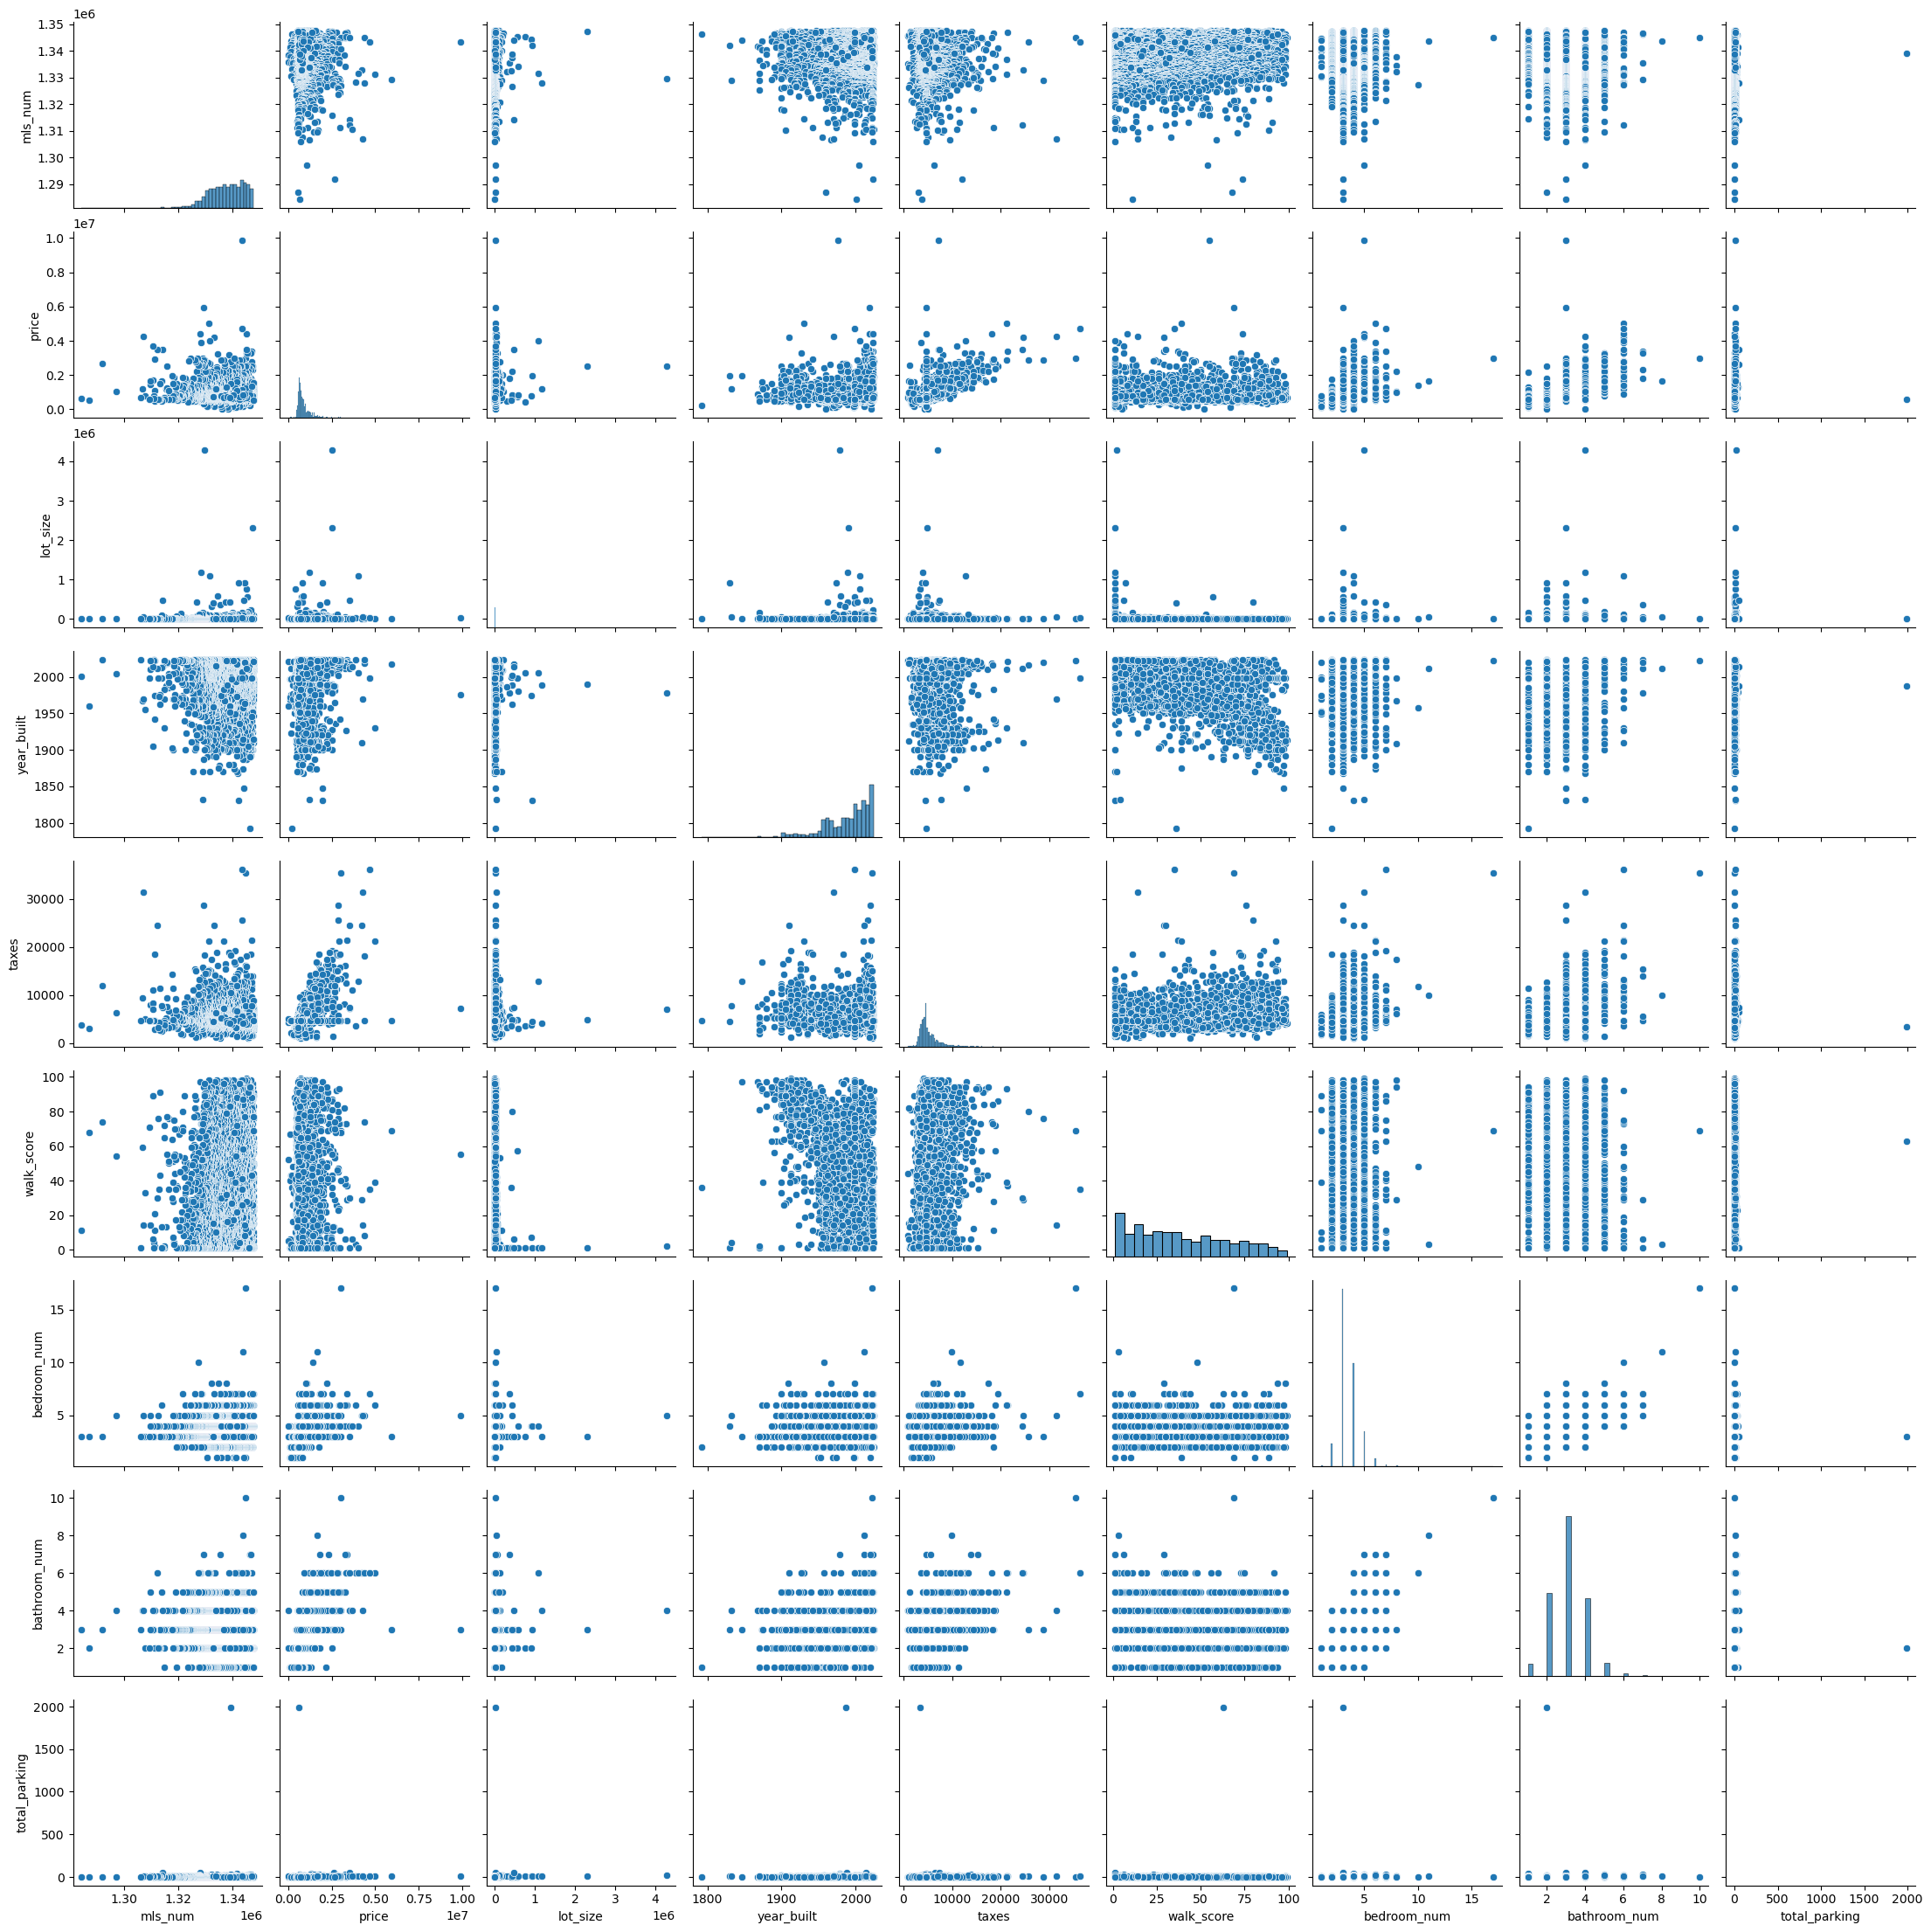

In [1078]:
# plot scatters for many variables to see if there are any noticeable correlations/data
sns.pairplot(properties_analysis)

Text(0, 0.5, 'Price')

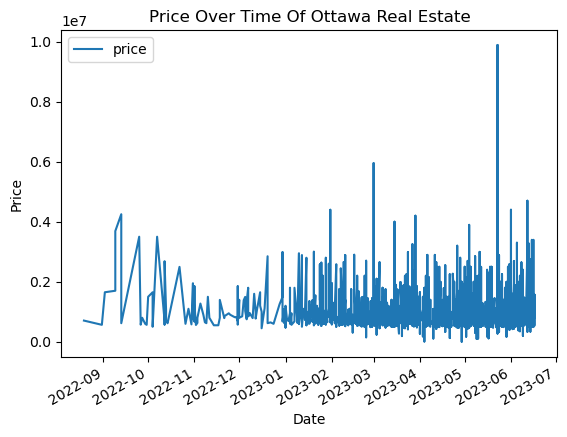

In [1079]:
# create a line chart of price over time (post_date)
properties_analysis['post_date'] = pd.to_datetime(properties_analysis['post_date'])
price_over_time = properties_analysis.sort_values('post_date')
price_over_time.plot(x='post_date', y='price', title ='Price Over Time Of Ottawa Real Estate')
plt.xlabel('Date')
plt.ylabel('Price')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2022-08'),
  Text(1, 0, '2022-09'),
  Text(2, 0, '2022-10'),
  Text(3, 0, '2022-11'),
  Text(4, 0, '2022-12'),
  Text(5, 0, '2023-01'),
  Text(6, 0, '2023-02'),
  Text(7, 0, '2023-03'),
  Text(8, 0, '2023-04'),
  Text(9, 0, '2023-05'),
  Text(10, 0, '2023-06')])

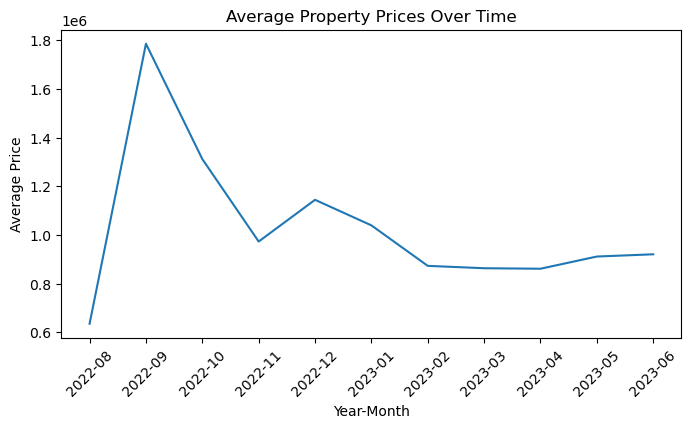

In [1105]:
properties_analysis['post_date'] = pd.to_datetime(properties_analysis['post_date'])
properties_analysis['year_month'] = properties_analysis['post_date'].dt.strftime('%Y-%m')
average_prices = properties_analysis.groupby('year_month')['price'].mean().reset_index()

# Plotting the average prices
plt.figure(figsize=(8, 4))
plt.plot(average_prices['year_month'], average_prices['price'])
plt.xlabel('Year-Month')
plt.ylabel('Average Price')
plt.title('Average Property Prices Over Time')
plt.xticks(rotation=45)

###### Average property prices have been on downtrend from August 2022 until now although there was a small pickup from May 2023 until June 2023

Text(0.5, 1.0, 'Distribution of Property Prices Of Ottawa Real Estate')

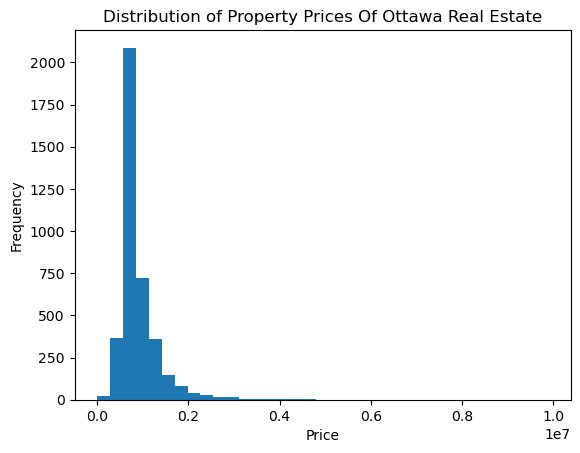

In [1095]:
# create a histogram of property prices
properties_analysis['price'].plot(kind='hist', bins=35)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Property Prices Of Ottawa Real Estate')

###### Median prices of Ottawa houses are around CAD $567,000-850,000.

In [1094]:
# calculate the frequency of each bin
frequency_table = pd.value_counts(pd.cut(properties_analysis['price'], bins=35))
frequency_table

(567668.571, 850102.857]      2087
(850102.857, 1132537.143]      721
(285234.286, 567668.571]       363
(1132537.143, 1414971.429]     358
(1414971.429, 1697405.714]     144
(1697405.714, 1979840.0]        84
(1979840.0, 2262274.286]        42
(2262274.286, 2544708.571]      27
(-7085.2, 285234.286]           20
(2544708.571, 2827142.857]      19
(2827142.857, 3109577.143]      17
(3109577.143, 3392011.429]       5
(3392011.429, 3674445.714]       5
(4239314.286, 4521748.571]       3
(3674445.714, 3956880.0]         2
(3956880.0, 4239314.286]         2
(4521748.571, 4804182.857]       2
(5933920.0, 6216354.286]         1
(4804182.857, 5086617.143]       1
(9605565.714, 9888000.0]         1
(5369051.429, 5651485.714]       0
(5651485.714, 5933920.0]         0
(5086617.143, 5369051.429]       0
(6216354.286, 6498788.571]       0
(6498788.571, 6781222.857]       0
(6781222.857, 7063657.143]       0
(7063657.143, 7346091.429]       0
(7346091.429, 7628525.714]       0
(7628525.714, 791096

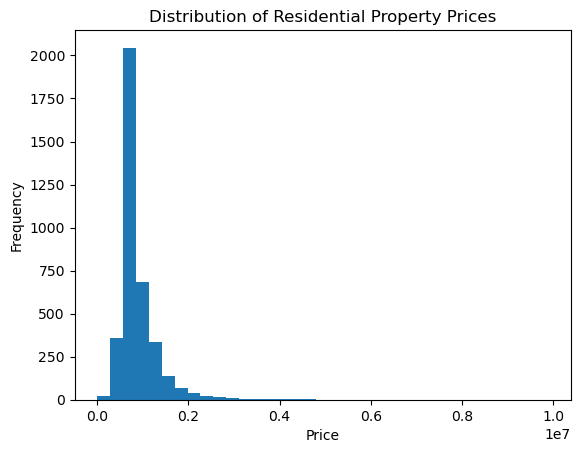

In [1113]:
# filter the DataFrame for 'residential' properties
residential_prices = properties_analysis[properties_analysis['type'] == 'Residential']['price']

# create a histogram of residential property prices
residential_prices.plot(kind='hist', bins=35)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Residential Property Prices')
plt.show()

In [1114]:
# calculate the frequency of each bin for residential properties only
residential_frequency_table = pd.value_counts(pd.cut(properties_analysis[properties_analysis['type'] == 'Residential']['price'], bins=35))
residential_frequency_table

(567668.571, 850102.857]      2045
(850102.857, 1132537.143]      683
(285234.286, 567668.571]       361
(1132537.143, 1414971.429]     333
(1414971.429, 1697405.714]     136
(1697405.714, 1979840.0]        71
(1979840.0, 2262274.286]        39
(2262274.286, 2544708.571]      24
(-7085.2, 285234.286]           20
(2544708.571, 2827142.857]      13
(2827142.857, 3109577.143]      11
(3109577.143, 3392011.429]       5
(3392011.429, 3674445.714]       5
(4239314.286, 4521748.571]       3
(3674445.714, 3956880.0]         2
(3956880.0, 4239314.286]         2
(4521748.571, 4804182.857]       2
(5933920.0, 6216354.286]         1
(4804182.857, 5086617.143]       1
(9605565.714, 9888000.0]         1
(5369051.429, 5651485.714]       0
(5651485.714, 5933920.0]         0
(5086617.143, 5369051.429]       0
(6216354.286, 6498788.571]       0
(6498788.571, 6781222.857]       0
(6781222.857, 7063657.143]       0
(7063657.143, 7346091.429]       0
(7346091.429, 7628525.714]       0
(7628525.714, 791096

Text(0, 0.5, 'Frequency')

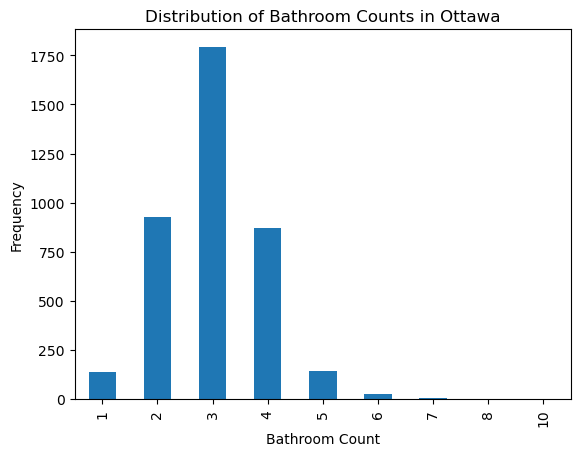

In [1082]:
# create a bar chart to visualize the distribution of bathroom counts
bathroom_counts = properties_analysis['bathroom_num'].value_counts().sort_index()
bathroom_counts.plot(kind='bar', title='Distribution of Bathroom Counts in Ottawa')
plt.xlabel('Bathroom Count')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

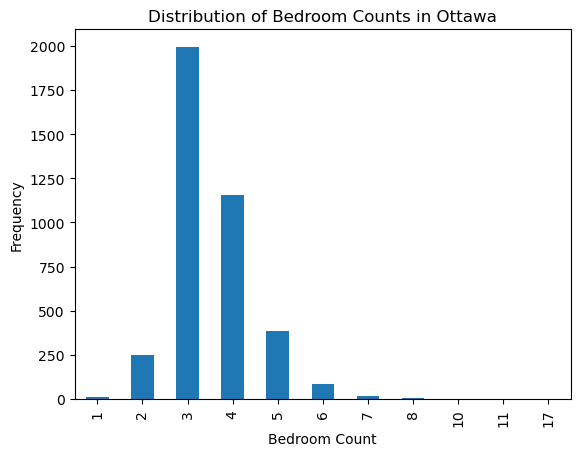

In [1083]:
# create a bar chart to visualize the distribution of bedroom counts
bedroom_counts = properties_analysis['bedroom_num'].value_counts().sort_index()
bedroom_counts.plot(kind='bar', title = 'Distribution of Bedroom Counts in Ottawa')
plt.xlabel('Bedroom Count')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

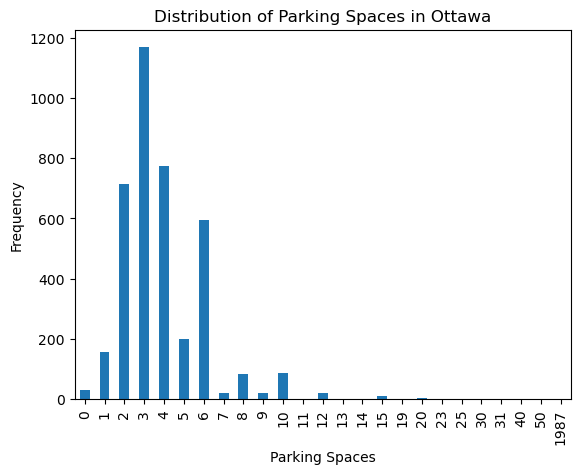

In [1084]:
# create a bar chart to visualize the distribution of parking spaces
bedroom_counts = properties_analysis['total_parking'].value_counts().sort_index()
bedroom_counts.plot(kind='bar', title = 'Distribution of Parking Spaces in Ottawa')
plt.xlabel('Parking Spaces')
plt.ylabel('Frequency')

###### Three bedrooms, three bathroom, and three parking spaces are the most popular in Ottawa houses

In [1085]:
bathroom_stats = properties_analysis['bathroom_num'].describe()
bedroom_stats = properties_analysis['bedroom_num'].describe()
price_stats = properties_analysis['price'].describe()

print(bathroom_stats)
print(bedroom_stats)
print(price_stats)

count    3904.000000
mean        3.015113
std         0.918133
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bathroom_num, dtype: float64
count    3904.000000
mean        3.518955
std         0.929572
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        17.000000
Name: bedroom_num, dtype: float64
count    3.904000e+03
mean     9.019881e+05
std      4.785510e+05
min      2.800000e+03
25%      6.399000e+05
50%      7.590000e+05
75%      9.988000e+05
max      9.888000e+06
Name: price, dtype: float64


In [1086]:
# In this section, we will from business prespective to see the overall senario and distribution among these listings
# People are likly willing to know the price distrubution among different types of properties,
# which areas are those listing properties belongs to, 
# is there a correlation between price and any other features,
# and more...
# More specificly, we will mainly focus on the following aspacts:

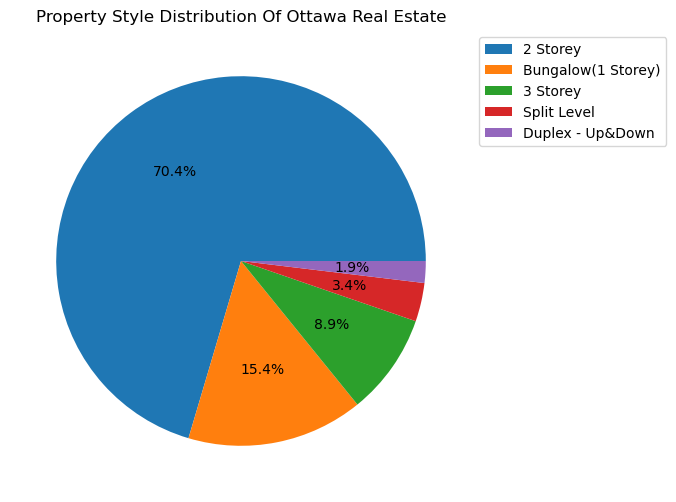

In [1087]:
# Get the overal view about all listings, get top 5 popular property styles in the market.
pie_counts = properties_analysis['style'].value_counts().head(5)# Get data set
plt.figure(figsize=(6, 6)) # Set figure size
plt.pie(pie_counts,autopct='%1.1f%%')
plt.title("Property Style Distribution Of Ottawa Real Estate") # Add title
# Add label legend, bbox_to_anchor parameter to keep legend on the most upper right
plt.legend(labels=pie_counts.index,bbox_to_anchor=(1,1))

###### 2 storey style property has the most amount of listing in the marketing. It may reflect that people are more willing to purchase this type of house because of its number of bedroom and its capacity.

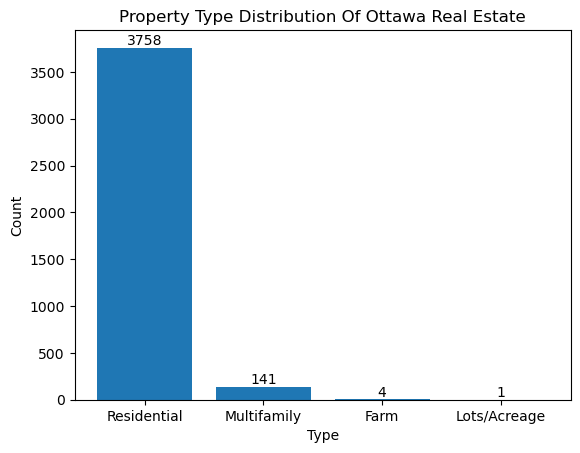

In [1088]:
# Get the overal view about all listings, how many types of properties are there in the market.
type_counts = properties_analysis['type'].value_counts() # Get data set
plt.bar(type_counts.index, type_counts) # Make bar chart
# Add label for x and y axis
plt.xlabel('Type') 
plt.ylabel('Count')
plt.title("Property Type Distribution Of Ottawa Real Estate") # Add title
# Add value for each type
for i, count in enumerate(type_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

###### From this chart, we can clearly see that the majortiy property type is 'Residential', so let us different styles in this type of property. 

In [1089]:
# Now let's see in this type of property, what are the styles
# Set data set
residential_style = properties_analysis[properties_analysis['type'] == 'Residential']['style'].value_counts().head(5)

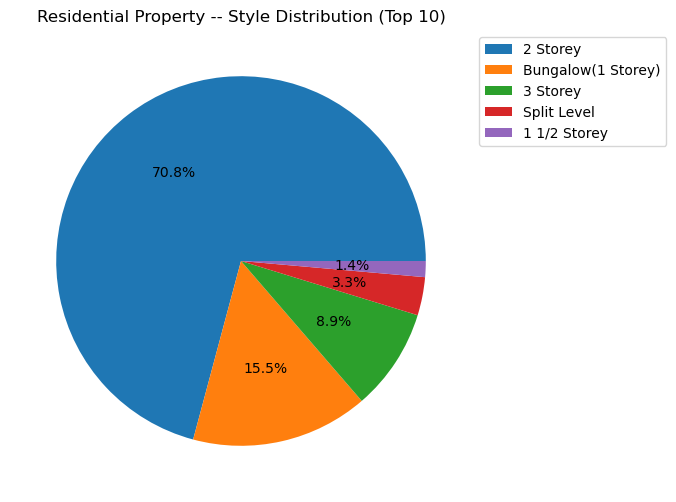

In [1090]:
# plot the chart
plt.figure(figsize=(6, 6)) # Set figure size
plt.pie(residential_style,autopct='%1.1f%%')
plt.title("Residential Property -- Style Distribution (Top 10)") # Add title
# Add label legend, bbox_to_anchor parameter to keep legend on the most upper right
plt.legend(labels=residential_style.index,bbox_to_anchor=(1,1))

###### The result is quite similar with the previous one, because this type of property nearly dominate the market, that why give us the similar distribution of different styles buildings.

In [ ]:
# We get the top 5 styles in 'Residential' type property. Let's see the max & min price in each category

In [1096]:
# Set the dataset to get the top 5 styles
df_sub = properties_analysis[properties_analysis['type'] == 'Residential'][['style','price']]
style_names = df_sub['style'].value_counts().head(5).index

In [1097]:
# To filter the dataset only contain top 5 styles
df_sub = df_sub[df_sub['style'].isin(style_names)]
df_sub

,style,price
1,2 Storey,798000
2,Bungalow(1 Storey),1225000
3,2 Storey,659000
5,2 Storey,709000
7,2 Storey,555000
...,...,...
39582,Split Level,4250000
39585,2 Storey,3688000
39592,2 Storey,1650000
39593,2 Storey,565000


In [1098]:
# Get the max/min price per category
df_sub = df_sub.groupby(by = 'style')['price'].agg(['min', 'max'])
df_sub

,min,max
style,,
1 1/2 Storey,169900,1999000
2 Storey,2800,5950000
3 Storey,465000,5000000
Bungalow(1 Storey),10000,9888000
Split Level,495000,4250000


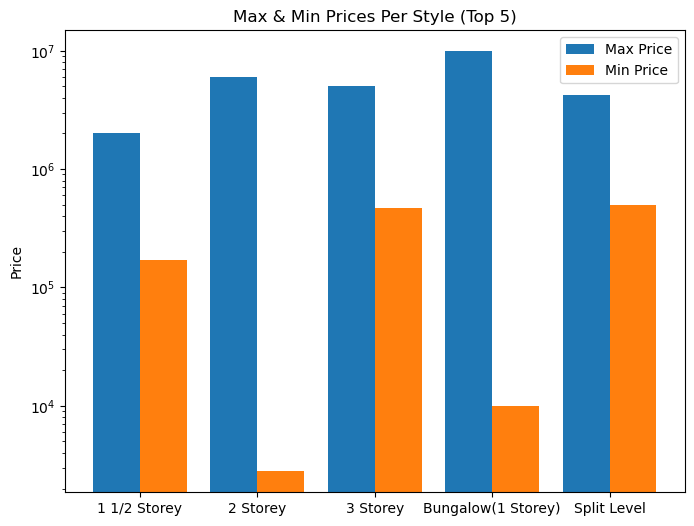

In [1099]:
# Plot a combined bar chart to show max / min price in each category
x_axis = np.arange(len(df_sub.index))
plt.figure(figsize=(8,6))# set the length of x axis
plt.bar(x_axis - 0.2, df_sub['max'], 0.4, label = 'Max Price')
plt.bar(x_axis + 0.2, df_sub['min'], 0.4, label = 'Min Price')
plt.yscale('log') # to make min values are notable
plt.xticks(x_axis,df_sub.index)
plt.ylabel('Price')
plt.title('Max & Min Prices Per Style (Top 5)')
plt.legend(loc= 'best')

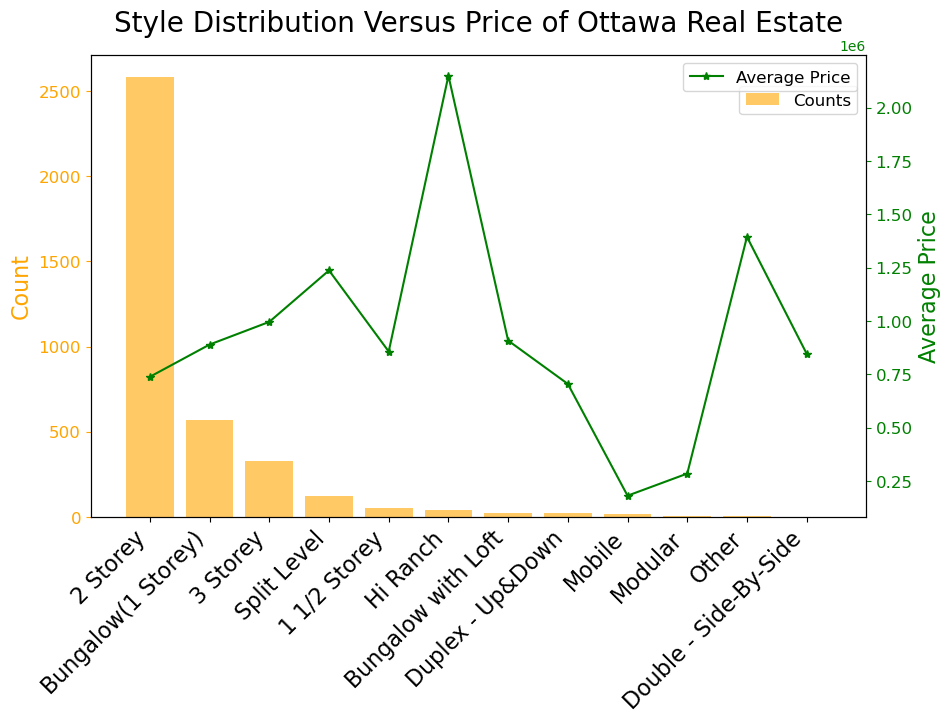

In [1091]:
# Let's explore priceing in some dimensions
# To show avarage price in each style in 'Residential'

# Get avg price
sub = properties_analysis[properties_analysis['type'] == 'Residential']
# Set bar chart data
bar_plot = sub['style'].value_counts()
# Set line chart data
line_plot = sub.groupby(by = ['style'])['price'].mean().round(0)

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize = (10,6))

# Create the bar chart for count
x = range(len(bar_plot.index))
ax1.bar(x, bar_plot, align='center', alpha=0.6, color='orange')
ax1.set_ylabel('Count', color='orange',fontsize = 16)
ax1.tick_params('y', colors='orange',labelsize = 12)
plt.legend(['Counts'],bbox_to_anchor=(1,0.95),fontsize = 12)

# Create the line chart for average price
ax2 = ax1.twinx() # Share the same x - axis with first chart
ax2.plot(x, line_plot, marker='*',color='green')
ax2.set_ylabel('Average Price', color='green',fontsize = 16)
ax2.tick_params('y', colors='green',labelsize = 12)

# Customize x-axis labels
plt.xticks(x, bar_plot.index)
ax1.set_xticklabels(bar_plot.index, rotation=45, ha='right',fontsize = 16)

# Add title
plt.title('Style Distribution Versus Price of Ottawa Real Estate',fontsize = 20)

# Add legend
plt.legend(['Average Price'],loc='upper right',fontsize = 12)

###### While two-story houses and bungalow are the most popular, hi-ranch houses are the most expensive.

In [897]:
# Get top (10) average price in different area

In [898]:
# Create a sub dataframe for the most popular area with their average price
area_price = properties_analysis[['town','price']].groupby(by='town').mean().round(0).sort_values(by='price',ascending = False).head(10)

In [899]:
# Create a sub dateframe with number of listing in the most popular area
area_count = properties_analysis['town'].value_counts().sort_values(ascending = False).head(10)

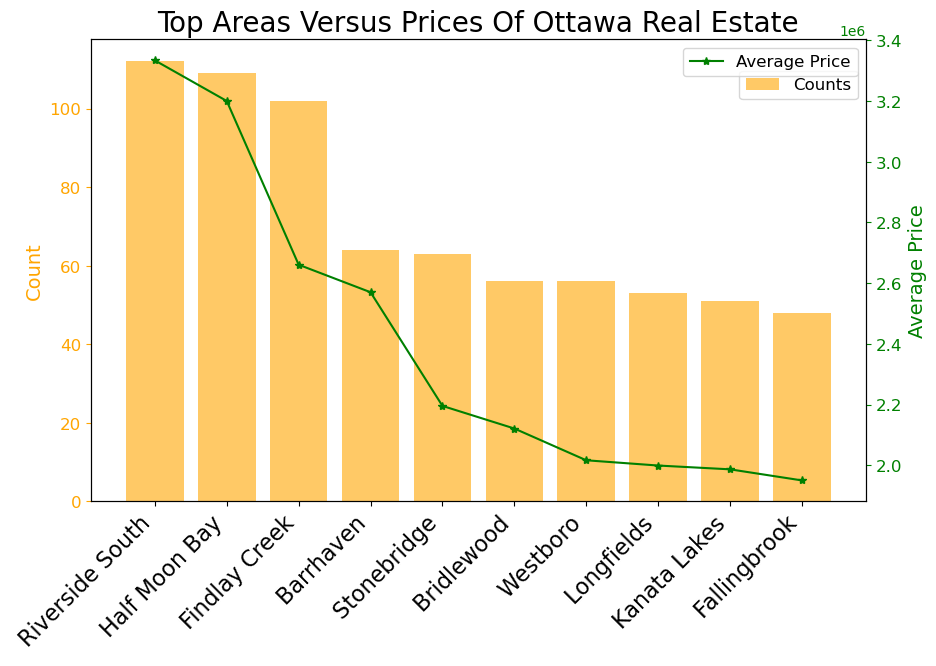

In [937]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize = (10,6))

# Create the bar chart for count
x = range(len(area_count.index))
ax1.bar(x, area_count, align='center', alpha=0.6, color='orange')
ax1.set_ylabel('Count', color='orange',fontsize = 14)
ax1.tick_params('y', colors='orange',labelsize = 12)
plt.legend(['Counts'],bbox_to_anchor=(1,0.95),fontsize = 12)

# Create the line chart for average price
ax2 = ax1.twinx() # Share the same x - axis with first chart
ax2.plot(x, area_price, marker='*',color='green')
ax2.set_ylabel('Average Price', color='green',fontsize = 14)
ax2.tick_params('y', colors='green',labelsize = 12)

# Customize x-axis labels
plt.xticks(x, area_count.index)
ax1.set_xticklabels(area_count.index, rotation=45, ha='right',fontsize = 16)

# Add title
plt.title('Top Areas Versus Prices Of Ottawa Real Estate',fontsize = 20)

# Add legend
plt.legend(['Average Price'],loc='upper right',fontsize = 12)

###### Compared with previous chart regarding avarage price in each style in 'Residential' category, this chart makes more meaningful. Obviously, the more popular the area, the higher average price will be. The same for the less popular areas.

In [939]:
# Now get some insights for the relationship between price and some property features,
# like number of bedroom / bathroom, total parking and building year

Text(0.5, 1.0, 'Price vs. Walk Scores Of Ottawa Real Estate')

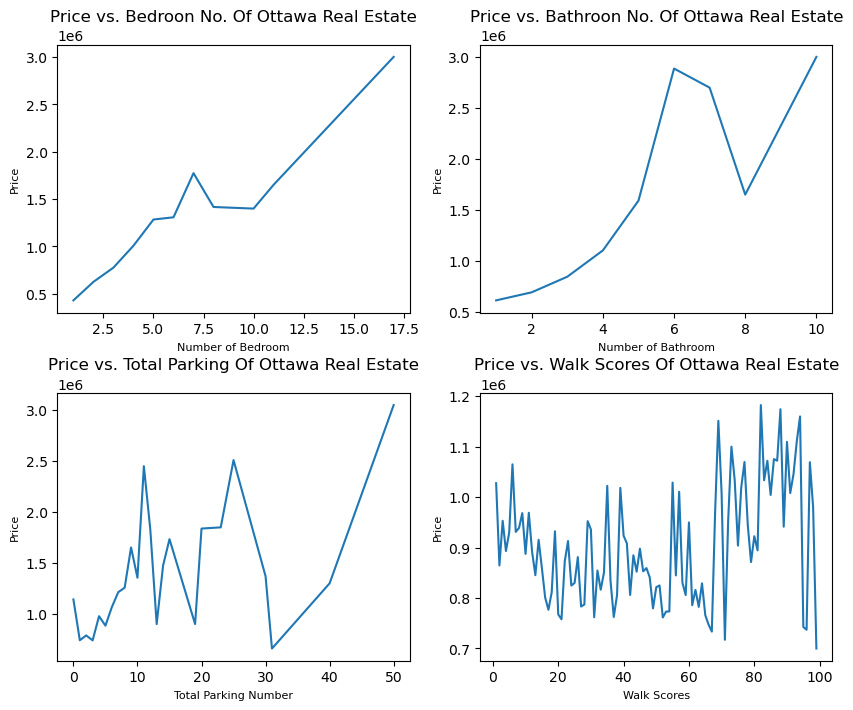

In [973]:
# Set sub plot to show different trends
fig,axes = plt.subplots(2,2,figsize = (10,8),gridspec_kw={'hspace': 0.3})

# Plot price & bedroom_num
# Create dataset
bedroom_price = properties_analysis[['bedroom_num','price']].groupby(by='bedroom_num').mean().round(0)
axes[0,0].plot(bedroom_price.index,bedroom_price.values)
axes[0,0].set_xlabel('Number of Bedroom', fontsize = 8)
axes[0,0].set_ylabel('Price', fontsize = 8)
axes[0,0].set_title('Price vs. Bedroon No. Of Ottawa Real Estate')

# Plot price & bathroom_num
# Create dataset
bathroom_price = properties_analysis[['bathroom_num','price']].groupby(by='bathroom_num').mean().round(0)
axes[0,1].plot(bathroom_price.index,bathroom_price.values)
axes[0,1].set_xlabel('Number of Bathroom', fontsize = 8)
axes[0,1].set_ylabel('Price', fontsize = 8)
axes[0,1].set_title('Price vs. Bathroon No. Of Ottawa Real Estate')

# Plot price & total parking
# Create dataset
# For parking column, there is an extreme outlier, so need to drop it first
temp = properties_analysis[properties_analysis['total_parking'] != properties_analysis['total_parking'].max()]
parking_price = temp[['total_parking','price']].groupby(by='total_parking').mean().round(0)
axes[1,0].plot(parking_price.index,parking_price.values)
axes[1,0].set_xlabel('Total Parking Number', fontsize = 8)
axes[1,0].set_ylabel('Price', fontsize = 8)
axes[1,0].set_title('Price vs. Total Parking Of Ottawa Real Estate')

# Plot price & walk score
# Create dataset
walk_score_price = properties_analysis[['walk_score','price']].groupby(by='walk_score').mean().round(0)
axes[1,1].plot(walk_score_price.index,walk_score_price.values)
axes[1,1].set_xlabel('Walk Scores', fontsize = 8)
axes[1,1].set_ylabel('Price', fontsize = 8)
axes[1,1].set_title('Price vs. Walk Scores Of Ottawa Real Estate')



###### There is a positive correlation between the number of bedrooms, bathrooms and property prices. The more of rooms houses have, the more expensive they are.
###### On the other hand, there is not a clear correlation between parking paces, walk scores and property prices.

###### According to these subplots, we can find that compared with the first row, both two plots in the second row have much more unnormal  trends, which are probably away to the reality. Especially for total_parking column, we have already remove oen extreme outlier, but it still seams  unnormal. So there is need to further check the outliers.

Text(0.5, 1.0, 'Price vs. Building Year Of Ottawa Real Estate')

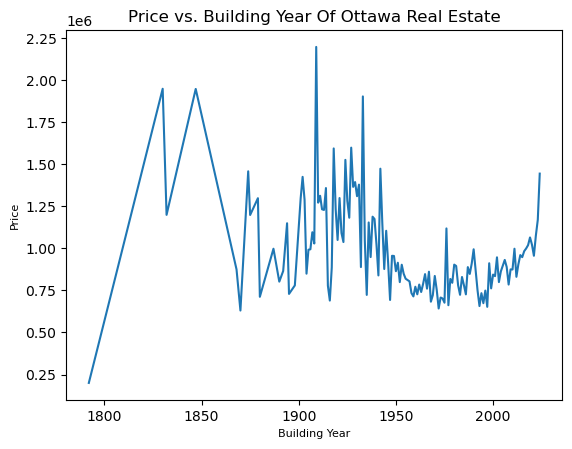

In [1001]:
# Plot price & year
# Create dataset
# year_price = properties_analysis[['year_built','price']].groupby(by='year_built').mean().round(0)
# axes[1,1].plot(year_price.index,year_price.values)
# axes[1,1].set_xlabel('Building Year', fontsize = 8)
# axes[1,1].set_ylabel('Price', fontsize = 8)
# axes[1,1].set_title('Price vs. Building Year Of Ottawa Real Estate')

year_price = properties_analysis[['year_built','price']].groupby(by='year_built').mean().round(0)
plt.plot(year_price.index,year_price.values)
# year_price.plot(x='year_built', y='price')
plt.xlabel('Building Year', fontsize = 8)
plt.ylabel('Price', fontsize = 8)
plt.title('Price vs. Building Year Of Ottawa Real Estate')

###### There is not a clear correlation between building years and property prices in Ottawa although it seems there are two outliers with houses built around 1975 and houses built around 2022.

Text(0.5, 1.0, 'Year Boxplot Of Ottawa Real Estate')

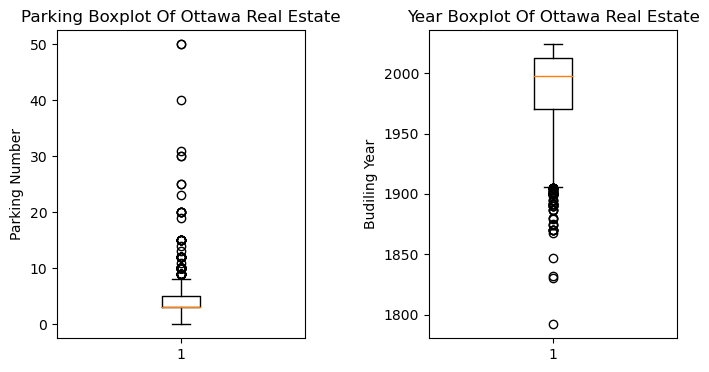

In [950]:
# Make box plot for total_parkinbg and year_built columns to check outliers
fig,axes = plt.subplots(1,2,figsize = (8,4),gridspec_kw={'wspace': 0.5})
axes[0].boxplot(temp['total_parking'])
axes[0].set_ylabel('Parking Number')
axes[0].set_title('Parking Boxplot Of Ottawa Real Estate')

axes[1].boxplot(properties_analysis['year_built'])
axes[1].set_ylabel('Budiling Year')
axes[1].set_title('Year Boxplot Of Ottawa Real Estate')

###### For both features, there are some outliers remaining. In the left chart, we can see lots of outliers are approximately higher than 8, which can be considered to match the reality. Of course, the majority number of total parking is around 5, which absolutely makes sense.
###### The chart on the right hand side, has outliers start from year of 1900, which means these properties are very ancient. We can see from the plot, the average year of these listing is around 2000, which tells us the most listings are not extremely many years ago.

Text(0.5, 1.0, 'Price vs. Building Year Of Ottawa Real Estate')

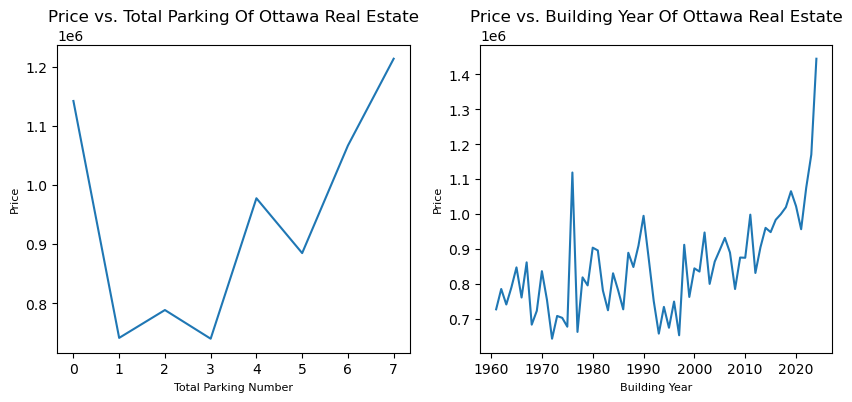

In [1117]:
# Try to plot chart after removing the outliers and more focus on the average data
# Set sub plot to show different trends
fig,axes = plt.subplots(1,2,figsize = (10,4))

# Plot price & total parking
# Create dataset
# For parking column, there is an extreme outlier, so need to drop it first
temp1 = properties_analysis[properties_analysis['total_parking'] < 8]
parking_price_outliersremoved = temp1[['total_parking','price']].groupby(by='total_parking').mean().round(0)
axes[0].plot(parking_price_outliersremoved.index,parking_price_outliersremoved.values)
axes[0].set_xlabel('Total Parking Number', fontsize = 8)
axes[0].set_ylabel('Price', fontsize = 8)
axes[0].set_title('Price vs. Total Parking Of Ottawa Real Estate')

# Plot price & building year
temp2 = properties_analysis[properties_analysis['year_built'] > 1960]
year_price_outliersremoved = temp2[['year_built','price']].groupby(by='year_built').mean().round(0)
axes[1].plot(year_price_outliersremoved.index,year_price_outliersremoved.values)
axes[1].set_xlabel('Building Year', fontsize = 8)
axes[1].set_ylabel('Price', fontsize = 8)
axes[1].set_title('Price vs. Building Year Of Ottawa Real Estate')

In [1110]:
# To explore how many listings are posted along the dates
# Create needed dataset
date_posting = properties_analysis[['post_date','mls_num']].groupby(by='post_date').count().sort_values(by='post_date')
# Focus on this year
# date_plot = date_posting[date_posting.index > '2023-01-01']

Text(0.5, 1.0, 'Daily Number of Posting Trend in Ottawa')

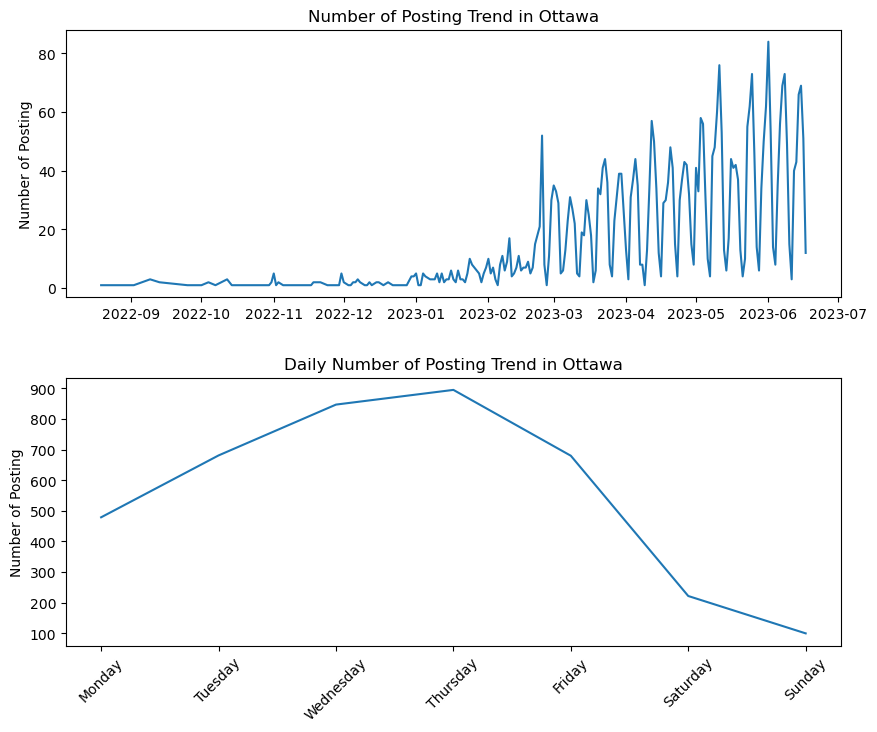

In [1112]:
fig,axes = plt.subplots(2,figsize=(10,8),gridspec_kw={'hspace': 0.3})
# Plot a posting line throught this year
axes[0].plot(date_posting)
axes[0].set_ylabel('Number of Posting')
axes[0].set_title('Number of Posting Trend in Ottawa')

# Plot a posting line throught each day of a week
day_of_week_plot = properties_analysis['post_date'].dt.dayofweek.value_counts().sort_index()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
axes[1].plot(day_of_week_plot.index, day_of_week_plot.values)
axes[1].set_xticks(day_of_week_plot.index)
axes[1].set_xticklabels(day_order,rotation=45)
axes[1].set_ylabel('Number of Posting')
axes[1].set_title('Daily Number of Posting Trend in Ottawa')

###### The chart depicting the trend in the number of postings demonstrates clear fluctuations over the course of the year. Notably, there is a gradual growth trend observed, with a more pronounced increase occurring from the end of February to June, during the spring to summer period. This can be because of favorable weather and school calendar.
###### The Daily Number of Posting Trend shows an interesting trend among a typical week. The number of posting will continuously increase from Monday until hit the peak on Thursday. Then keep dropping to the end the each week. Reasonably, most agents will off during the weekends

Text(0, 0.5, 'Price')

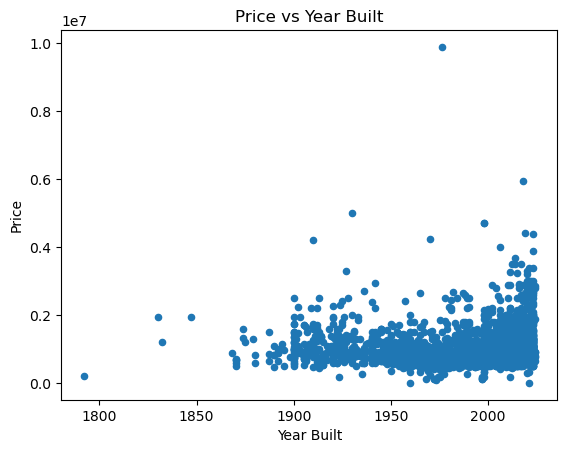

In [832]:
# create a scatter plot of price vs. year_built
properties_analysis.plot(kind='scatter', x='year_built', y='price', title = 'Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')

Text(0.5, 1.0, 'Property Prices vs. Walk Scores')

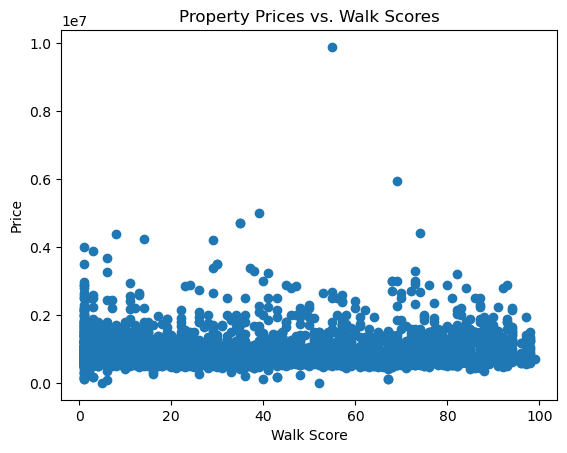

In [857]:
# create a scatter plot of property prices and walk scores
plt.scatter(properties_analysis['walk_score'], properties_analysis['price'])
plt.xlabel('Walk Score')
plt.ylabel('Price')
plt.title('Property Prices vs. Walk Scores')

Text(0.5, 1.0, 'Price vs. Bedroom Count')

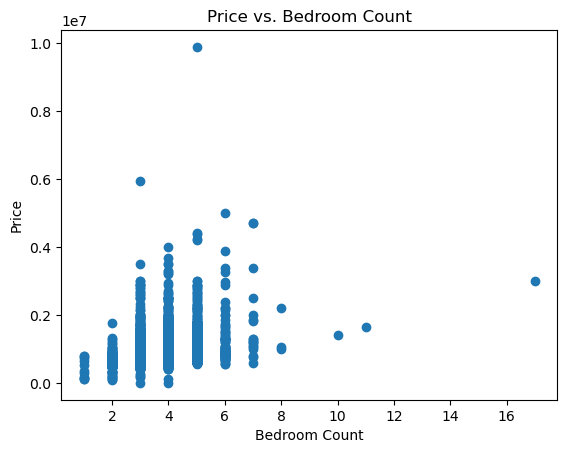

In [894]:
# create a scatter plot to analyze the relationship between price and bedroom count
plt.scatter(properties_analysis['bedroom_num'], properties_analysis['price'])
plt.xlabel('Bedroom Count')
plt.ylabel('Price')
plt.title('Price vs. Bedroom Count')

Text(0.5, 1.0, 'Price vs. Bathroom Count')

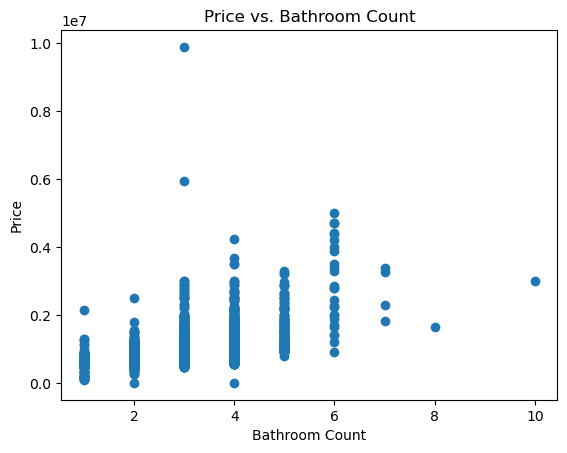

In [895]:
# create a scatter plot to analyze the relationship between price and bathroom count
plt.scatter(properties_analysis['bathroom_num'], properties_analysis['price'])
plt.xlabel('Bathroom Count')
plt.ylabel('Price')
plt.title('Price vs. Bathroom Count')

Text(0.5, 1.0, 'Price vs. Parking Count')

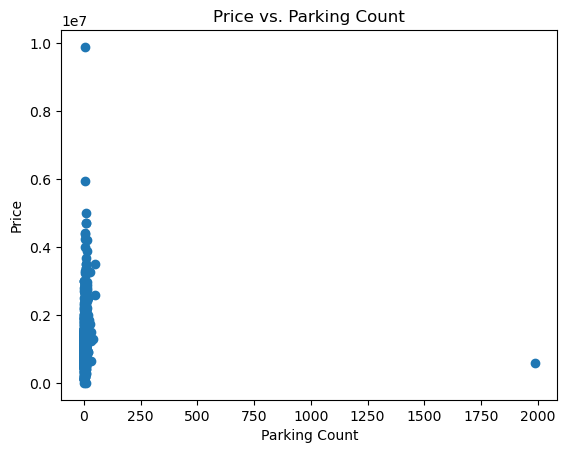

In [1063]:
# create a scatter plot to analyze the relationship between price and bedroom count
plt.scatter(properties_analysis['total_parking'], properties_analysis['price'])
plt.xlabel('Parking Count')
plt.ylabel('Price')
plt.title('Price vs. Parking Count')